<a href="https://colab.research.google.com/github/yeho/scikit-learn-AI/blob/master/Analisis_de_sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 **Análisis de Sentimientos con el Dataset Sentiment140**

Este notebook implementa un modelo de análisis de sentimientos utilizando el dataset Sentiment140, el cual contiene 1.6 millones de tweets etiquetados como positivos o negativos. Se utiliza un modelo sencillo de red neuronal construido con TensorFlow/Keras para clasificar textos cortos.

⸻

🔍 **Características:**

*	Carga y muestreo del dataset Sentiment140
*	Preprocesamiento del texto y tokenización
*	Relleno de secuencias (padding) y limitación del vocabulario
*	Arquitectura simple de red neuronal:
*	Capa Embedding
*	GlobalAveragePooling
*	Capas Dense para clasificación
*	Visualización de métricas de precisión por época
*	Prueba de predicción con textos personalizados

⸻

📦 **Librerías utilizadas:**

*	pandas, numpy, matplotlib
*	scikit-learn
*	tensorflow.keras

⸻

▶️ **Cómo ejecutarlo en Google Colab**

1.	Abre el siguiente enlace: https://colab.research.google.com
2.	Sube este notebook (.ipynb) desde tu computadora o cópialo a tu Google Drive.
3.	Asegúrate de tener el archivo training.1600000.processed.noemoticon.csv disponible:
  *	Puedes cargarlo desde tu Google Drive
  *	O subirlo manualmente a Colab desde tu equipo
4.	Si usas Google Drive, monta tu drive ejecutando:
  
```
from google.colab import drive
drive.mount('/content/drive')

```
5.	Ajusta la ruta del archivo CSV:

```
  df = pd.read_csv('/content/drive/MyDrive/ruta/a/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

```

⸻

**Posibles mejoras futuras**
*	🔤 Aplicar limpieza avanzada de texto: eliminación de menciones, hashtags, emojis, URLs y stopwords.
*	📈 Incorporar técnicas de data augmentation para enriquecer el entrenamiento.
*	🧠 Usar modelos más sofisticados como LSTM, GRU o transformers (por ejemplo, BERT).
*	⚖️ Manejo de desbalance de clases (upsampling o técnicas de penalización).
*	📊 Evaluación más completa usando métricas como F1-score, matriz de confusión y curva ROC.
*	🌍 Añadir soporte para múltiples idiomas.
*	🧪 Desplegar el modelo como una API o aplicación web para prueba interactiva.


Paso 1: Cargar librerías necesarias

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D


Paso 2: Cargar datos de ejemplo

In [35]:
# 1. Cargar el dataset (ajusta la ruta al archivo CSV de Sentiment140)
# Columnas: [target, ids, date, flag, user, text]
# target: 0 = negativo, 4 = positivo

df = pd.read_csv("training.1600000.processed.noemoticon.csv",
                 encoding='latin-1', header=None,
                 names=["sentiment", "id", "date", "flag", "user", "text"])

# 2. Filtrar y limpiar
df = df[['sentiment', 'text']]
df['sentiment'] = df['sentiment'].replace({0: 0, 4: 1})  # Reetiquetar 4→1

# Opcional: muestreo para agilizar entrenamiento
df = df.sample(n=20000, random_state=42).reset_index(drop=True)


Paso 3: Preprocesamiento del texto Tokenizamos el texto y lo convertimos en secuencias de enteros.

In [36]:

# 3. Tokenización
vocab_size = 10000
max_length = 20
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


Paso 4: Crear la red neuronal

In [37]:
# 4. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(padded, df['sentiment'].values, test_size=0.2, random_state=42)

# Definir modelo
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Paso 5: Entrenar el modelo

In [38]:

# 5. Entrenamiento
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), verbose=1)


Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5909 - loss: 0.6671 - val_accuracy: 0.7170 - val_loss: 0.5563
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7777 - loss: 0.4931 - val_accuracy: 0.7445 - val_loss: 0.5228
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8200 - loss: 0.4107 - val_accuracy: 0.7483 - val_loss: 0.5333


Paso 6: Evaluar el modelo y probar con textos nuevos

In [39]:
# 6. Evaluación
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión: {accuracy:.2%}")

# Clasificación de nuevos textos
texts = ["I am very disappointed", "I absolutely love it", "I believe you can do it — can you help me with this?", "Creo que puedes hacerlo. ¿Puedes ayudarme con esto?"]
seqs = tokenizer.texts_to_sequences(texts)
padded_seqs = pad_sequences(seqs, maxlen=max_length, padding='post')
predictions = model.predict(padded_seqs)

for i, text in enumerate(texts):
    sentiment = "Positivo 😊" if predictions[i] > 0.5 else "Negativo 😠"
    print(f"Texto: '{text}' → {sentiment} - {predictions[i][0]:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7473 - loss: 0.5208
Precisión: 74.83%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Texto: 'I am very disappointed' → Negativo 😠 - 0.2216
Texto: 'I absolutely love it' → Positivo 😊 - 0.8458
Texto: 'I believe you can do it — can you help me with this?' → Positivo 😊 - 0.7421
Texto: 'Creo que puedes hacerlo. ¿Puedes ayudarme con esto?' → Negativo 😠 - 0.4043


Visualización de entrenamiento

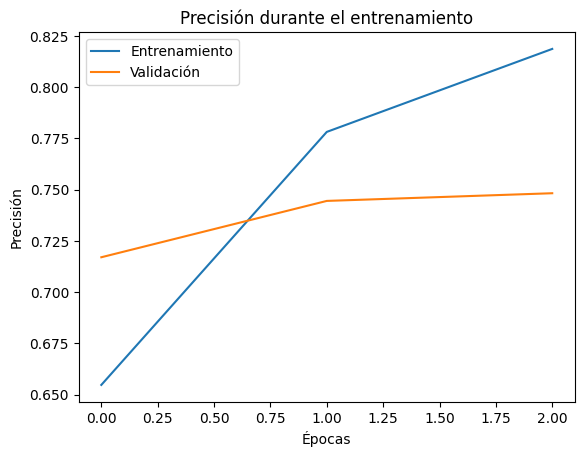

In [40]:
# 7. Visualización
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()